In [15]:
import pandas as pd
import numpy as np 
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import sklearn 
import seaborn as sb
import datetime

In [2]:
df_J=pd.read_excel("192602 JUNIN AERO 1988-2022.xlsx")
df_J

,Fecha,Temperatura,Unnamed: 2,Unnamed: 3,Precipitación
0,NaT,Máxima,Mínima,Media,NaN
1,NaT,(°C),NaN,NaN,(mm)
2,1988-01-01,31.8,17.2,25.5,0
3,1988-01-02,31.9,20.2,24.9,0
4,1988-01-03,34.1,21,26.4,0
...,...,...,...,...,...
12659,2022-08-27,19.7,8.3,14,0
12660,2022-08-28,15.5,-2.7,7.8,0
12661,2022-08-29,19.6,-3.1,8.1,0
12662,2022-08-30,20.5,-0.4,9.9,0


In [3]:
df_J.rename(columns={'Temperatura':'Temp_max','Unnamed: 2':'Temp_min','Unnamed: 3':'Temp_med'},
               inplace=True)

In [4]:
df_J

,Fecha,Temp_max,Temp_min,Temp_med,Precipitación
0,NaT,Máxima,Mínima,Media,NaN
1,NaT,(°C),NaN,NaN,(mm)
2,1988-01-01,31.8,17.2,25.5,0
3,1988-01-02,31.9,20.2,24.9,0
4,1988-01-03,34.1,21,26.4,0
...,...,...,...,...,...
12659,2022-08-27,19.7,8.3,14,0
12660,2022-08-28,15.5,-2.7,7.8,0
12661,2022-08-29,19.6,-3.1,8.1,0
12662,2022-08-30,20.5,-0.4,9.9,0


In [5]:
df_J.drop(df_J.index[[0,1]], inplace=True)
df_J

,Fecha,Temp_max,Temp_min,Temp_med,Precipitación
2,1988-01-01,31.8,17.2,25.5,0
3,1988-01-02,31.9,20.2,24.9,0
4,1988-01-03,34.1,21,26.4,0
5,1988-01-04,34.7,21.8,27.2,4.5
6,1988-01-05,28.8,19.7,23,0
...,...,...,...,...,...
12659,2022-08-27,19.7,8.3,14,0
12660,2022-08-28,15.5,-2.7,7.8,0
12661,2022-08-29,19.6,-3.1,8.1,0
12662,2022-08-30,20.5,-0.4,9.9,0


In [6]:
df_J.dtypes

Fecha            datetime64[ns]
Temp_max                 object
Temp_min                 object
Temp_med                 object
Precipitación            object
dtype: object

In [7]:
df_J['Temp_max'] = df_J['Temp_max'].replace(',','.')
df_J['Temp_min'] = df_J['Temp_min'].replace(',','.')
df_J['Temp_med'] = df_J['Temp_med'].replace(',','.')
df_J['Precipitación'] = df_J['Precipitación'].replace(',','.')



In [8]:
df_J['Temp_max'] = df_J['Temp_max'].astype(float)
df_J['Temp_min'] = df_J['Temp_min'].astype(float)
df_J['Temp_med'] = df_J['Temp_med'].astype(float)
df_J['Precipitación'] = df_J['Precipitación'].astype(float)

In [10]:
df_junin_P= df_J.drop(['Temp_max', 'Temp_min',"Temp_med"], axis=1)
df_junin_P

,Fecha,Precipitación
2,1988-01-01,0.0
3,1988-01-02,0.0
4,1988-01-03,0.0
5,1988-01-04,4.5
6,1988-01-05,0.0
...,...,...
12659,2022-08-27,0.0
12660,2022-08-28,0.0
12661,2022-08-29,0.0
12662,2022-08-30,0.0


In [11]:
df_junin_PM=df_junin_P.resample("M",on ="Fecha").sum()

<AxesSubplot:xlabel='Fecha'>

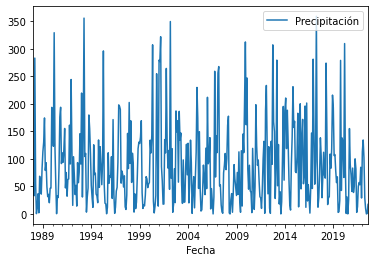

In [14]:
df_junin_PM.plot()

In [18]:
df_junin_PM.sample(30)

,Precipitación
Fecha,
2015-10-31,140.2
2005-10-31,35.0
2018-12-31,215.8
2012-12-31,150.0
2001-12-31,83.3
1991-01-31,111.0
1995-10-31,111.0
2021-02-28,38.9
2015-03-31,75.0


In [24]:

df_junin_PM.to_excel("ClimaJ.xlsx")